## Exploratory Data Analysis of FIFA 19 Player Dataset

### Introduction

This notebook goes through the process of exploratory data analysis which consists of;

- Data Cleaning & Preprocessing
- Evaluation of Basic Statistical Properties (Mean, Max. and Min Value, STD, etc.)
- Boxplot Analysis
- Distribution Analysis
- Correlation Analysis

The dataset has been downloaded from Kaggle [FIFA 19 complete player dataset.](https://www.kaggle.com/karangadiya/fifa19)

### Problem Statement

The goal for this project is, firstly, to reveal the logic behind FIFA 19's player ratings. Secondly, to understand the differences between players that have the top and the bottom overall rating.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
all_df = pd.read_csv('fifa19data.csv', index_col = 0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [2]:
selected_columns = pd.Series(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weight', 'Height', 'Position', 'Nationality', 'Club'])
print(selected_columns)

0              ID
1            Name
2             Age
3         Overall
4       Potential
5           Value
6            Wage
7          Weight
8          Height
9        Position
10    Nationality
11           Club
dtype: object


In [3]:
sel_df = all_df.loc[ :, selected_columns]
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,€110.5M,€565K,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,€77M,€405K,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,€118.5M,€290K,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,€72M,€260K,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,€102M,€355K,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,€93M,€340K,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,€67M,€420K,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,€80M,€455K,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,€51M,€380K,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,€68M,€94K,192lbs,6'2,GK,Slovenia,Atlético Madrid


"describe" function could not print most of the columns because of their data type is "object" rather than a numerical data type. The data should be cleaned.

In [4]:
sel_df.iloc[:, 1:].describe()

,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299
std,4.669943,6.908930,6.136496
min,16.000000,46.000000,48.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,45.000000,94.000000,95.000000


- Necessary packages and data have been imported.
- General info on data has been printed for a first look.
- The columns to use has been selected.

### Data Cleaning

1. Value, Wage, Weight and Height data should be cleaned and changed to a numerical data type.
2. Weight and Height data are given as Ibs and Feet, they should be changed to Kilogram and Centimeter.

In [5]:
i = 0;
while i <= 9:
    half_str = str(i) +".5"
    last_str = str(i)
    i += 1
    sel_df.Value = sel_df.Value.replace(half_str, last_str, regex=True)
sel_df.Value = sel_df.Value.replace('[€,.]', '', regex=True).replace('[M]', '000000', regex=True).replace('[K]', '000', regex=True)
sel_df.Value = sel_df.Value.astype(int)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110000000,€565K,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77000000,€405K,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118000000,€290K,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72000000,€260K,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102000000,€355K,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93000000,€340K,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67000000,€420K,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80000000,€455K,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51000000,€380K,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68000000,€94K,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [6]:
sel_df.Value = sel_df.Value.map(lambda p: p / 1000000)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,€565K,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,€405K,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,€290K,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,€260K,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,€355K,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,€340K,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,€420K,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,€455K,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,€380K,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,€94K,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [7]:
sel_df.Wage = sel_df.Wage.replace('[€,]', '', regex=True).replace('[M]', '000000', regex=True).replace('[K]', '000', regex=True)
sel_df.Wage = sel_df.Wage.astype(int)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565000,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405000,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290000,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260000,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355000,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340000,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420000,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455000,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380000,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94000,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [8]:
sel_df.Wage = sel_df.Wage.map(lambda p: p / 1000)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565.0,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290.0,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260.0,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355.0,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340.0,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420.0,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455.0,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380.0,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94.0,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [9]:
sel_df.Weight = sel_df.Weight.replace("lbs", '', regex=True)
sel_df.Weight = sel_df.Weight.astype(float)
sel_df.Weight = sel_df.Weight * 0.45359237
sel_df.Weight = sel_df.Weight.round()
sel_df.Weight = pd.to_numeric(sel_df["Weight"])
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565.0,72.0,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,83.0,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290.0,68.0,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260.0,76.0,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355.0,70.0,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340.0,74.0,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420.0,66.0,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455.0,86.0,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380.0,82.0,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94.0,87.0,6'2,GK,Slovenia,Atlético Madrid


In [10]:
def Feet(row):
    row.feet = row.Height[0]
    return row
def Inch(row):
    row.inch = row.Height[2:]
    return row

sel_df.Height = sel_df.Height.astype(str)
sel_df['feet'] = sel_df.Height
sel_df['inch'] = sel_df.Height
sel_df['Height_inch'] = sel_df.Height
sel_df = sel_df.apply(Feet, axis='columns')
sel_df = sel_df.apply(Inch, axis='columns')
sel_df.inch = pd.to_numeric(sel_df['inch'], errors='coerce')
sel_df.feet = pd.to_numeric(sel_df['feet'], errors='coerce')
sel_df.Height_inch = (sel_df.feet*12) + sel_df.inch
sel_df.Height = sel_df.Height_inch * 2.54
sel_df.Height = sel_df.Height.round()
sel_df = sel_df.drop(sel_df.columns[[12, 13, 14]], axis=1)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565.0,72.0,170.0,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,83.0,188.0,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290.0,68.0,175.0,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260.0,76.0,193.0,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355.0,70.0,180.0,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340.0,74.0,173.0,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420.0,66.0,173.0,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455.0,86.0,183.0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380.0,82.0,183.0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94.0,87.0,188.0,GK,Slovenia,Atlético Madrid


In [11]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           18207 non-null  int64  
 1   Name         18207 non-null  object 
 2   Age          18207 non-null  int64  
 3   Overall      18207 non-null  int64  
 4   Potential    18207 non-null  int64  
 5   Value        18207 non-null  float64
 6   Wage         18207 non-null  float64
 7   Weight       18159 non-null  float64
 8   Height       18159 non-null  float64
 9   Position     18147 non-null  object 
 10  Nationality  18207 non-null  object 
 11  Club         17966 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 1.8+ MB


- Value, Wage, Weight and Height data have been cleaned, changed to float data type and unit conversions has been done.

### Evaluation of Basic Statistical Properties

1. Dataframes created for top and bottom players according to the overall rating.
2. Columns to use in correlation analysis has been selected and stored in dataframes.

In [12]:
sel_col_for_corr = pd.Series(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weight', 'Height'])
forcorr_df = sel_df.loc[ :, sel_col_for_corr]

sel_df_top = sel_df.sort_values(by='Overall', ascending=False).iloc[:50,:]
sel_df_bottom = sel_df.sort_values(by='Overall', ascending=True).iloc[:50,:]

forcorr_df_top = sel_df_top.loc[ :, sel_col_for_corr]
forcorr_df_bottom = sel_df_bottom.loc[ :, sel_col_for_corr]

In [13]:
sel_df.iloc[:, 1:].describe()

,Age,Overall,Potential,Value,Wage,Weight,Height
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,6.333849,9.731312,75.289003,181.179911
std,4.669943,6.908930,6.136496,11.086936,21.999290,7.075511,6.691885
min,16.000000,46.000000,48.000000,0.000000,0.000000,50.000000,155.000000
25%,21.000000,62.000000,67.000000,0.090000,1.000000,70.000000,175.000000
50%,25.000000,66.000000,71.000000,0.450000,3.000000,75.000000,180.000000
75%,28.000000,71.000000,75.000000,9.000000,9.000000,80.000000,185.000000
max,45.000000,94.000000,95.000000,118.000000,565.000000,110.000000,206.000000


In [14]:
sel_df_top.iloc[:, 1:].describe()

,Age,Overall,Potential,Value,Wage,Weight,Height
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,28.820000,88.940000,89.740000,60.600000,245.120000,79.000000,182.12000
std,3.354497,1.671001,2.136276,22.087026,102.946318,8.637838,7.93247
min,19.000000,87.000000,87.000000,4.000000,77.000000,59.000000,163.00000
25%,26.000000,88.000000,88.000000,46.000000,161.250000,73.000000,175.00000
50%,29.000000,88.500000,89.000000,60.000000,240.000000,79.000000,183.00000
75%,31.000000,90.000000,91.000000,73.000000,311.250000,85.000000,188.00000
max,40.000000,94.000000,95.000000,118.000000,565.000000,96.000000,198.00000


In [15]:
sel_df_bottom.iloc[:, 1:].describe()

,Age,Overall,Potential,Value,Wage,Weight,Height
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,18.860000,47.560000,62.98000,0.052400,1.020000,72.000000,179.840000
std,4.365963,0.540597,4.93422,0.012382,0.141421,6.249898,6.099046
min,16.000000,46.000000,48.00000,0.000000,1.000000,61.000000,168.000000
25%,17.000000,47.000000,60.00000,0.050000,1.000000,67.000000,175.750000
50%,18.000000,48.000000,64.00000,0.060000,1.000000,71.500000,178.000000
75%,19.000000,48.000000,66.00000,0.060000,1.000000,75.750000,185.000000
max,44.000000,48.000000,72.00000,0.070000,2.000000,86.000000,196.000000


**Results to the first round of analysis:**

1. **General**
    - The mean age is 25 and the mean age of %75 is 28 which indicates there is a little percent of players who are above the age of 30.
    - Value and Wage have the maximum value of STD's and there is a huge between max and %75 values, which indicates there is a huge gap between players.
    - An average player has a weight of 75kg and a height of 181cm, he is at the age of 25 with 66 overall and 71 potential ratings, also, he gains nearly 10.000 euros and worths 6 million euros. But, these are just mean values, they **cannot represent the real situation while the distribution is far away from being normal.** So, do not build your career plans on these numbers. :)
    
    
2. **Top 50 Players**
    - The mean age is high, mean overall and potential is close. This means that they are mostly aged players who are at the top of their careers.
    - Value and Wage STDs are much more higher than general which means most of the money goes to the players who are "the top players of top players".
    
    
3. **Bottom 50 Players**
    - The mean age is so low and there is a huge gap between mean overall and potential. The players are mostly young players who are going to develop to be an average player in the future.
    - Values and Wages are so close to each other in this group.

In [16]:
def box(df, df_top, df_bottom):
    l = df.iloc[ :, [2,3,4,5,6,7,8]].columns.values
    number_of_columns=7
    number_of_rows =3
    plt.figure(figsize=(number_of_columns,4*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows,number_of_columns, i+1)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],color='coral',orient='v')
        plt.subplot(number_of_rows,number_of_columns, i+1+number_of_columns)
        sns.boxplot(df_top[l[i]],color='steelblue',orient='v')
        plt.subplot(number_of_rows,number_of_columns, i+1+(number_of_columns*2))
        sns.boxplot(df_bottom[l[i]],color='seagreen',orient='v')
        plt.tight_layout()

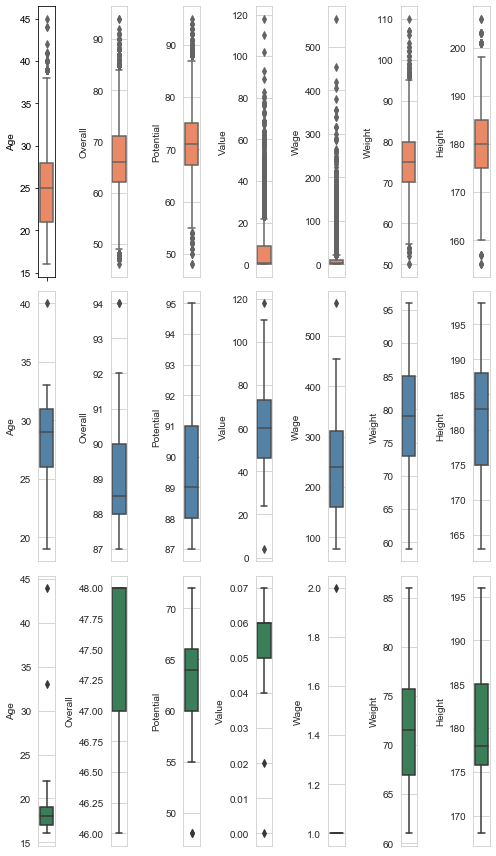

In [17]:
box(sel_df, sel_df_top, sel_df_bottom) # Red: General Data, Blue: Top Data, Green: Bottom Data

### Results to Boxplot Analysis

- In general data, there are so many outliers in Value and Wage, which supports the previous argument that most of the money goes to top players. The distribution of these data seems to be highly skewed and mean value cannot summarize them. **So, the average player does not earn 9K, he earns nearly 1K.**
- There are just two value of wage in the bottom group.
- There are only two players that are above 30 age in the bottom group, which supports the previous argument about the general characteristic of this group.

In [18]:
def distribution(df, df_top, df_bottom):
    l = df.iloc[ :, [2,3,4,5,6,7,8]].columns.values
    number_of_columns=7
    number_of_rows =3
    plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows,number_of_columns, i+1)
        sns.set_style('whitegrid')
        sns.distplot(df[l[i]].dropna(),kde=True,color='coral')
        
        plt.subplot(number_of_rows,number_of_columns, i+1+number_of_columns)
        sns.distplot(df_top[l[i]].dropna(),kde=True,color='steelblue')
        
        if(i!=4): #Since there is just two values of wage in bottom players, no need to plot Kernel Density Estimation(KDE).
            plt.subplot(number_of_rows,number_of_columns, i+1+(number_of_columns*2))
            sns.distplot(df_bottom[l[i]].dropna(),kde=True,color='seagreen')
        else:
            plt.subplot(number_of_rows,number_of_columns, i+1+(number_of_columns*2))
            sns.distplot(df_bottom[l[i]].dropna(),kde=False,color='seagreen')

        plt.tight_layout()

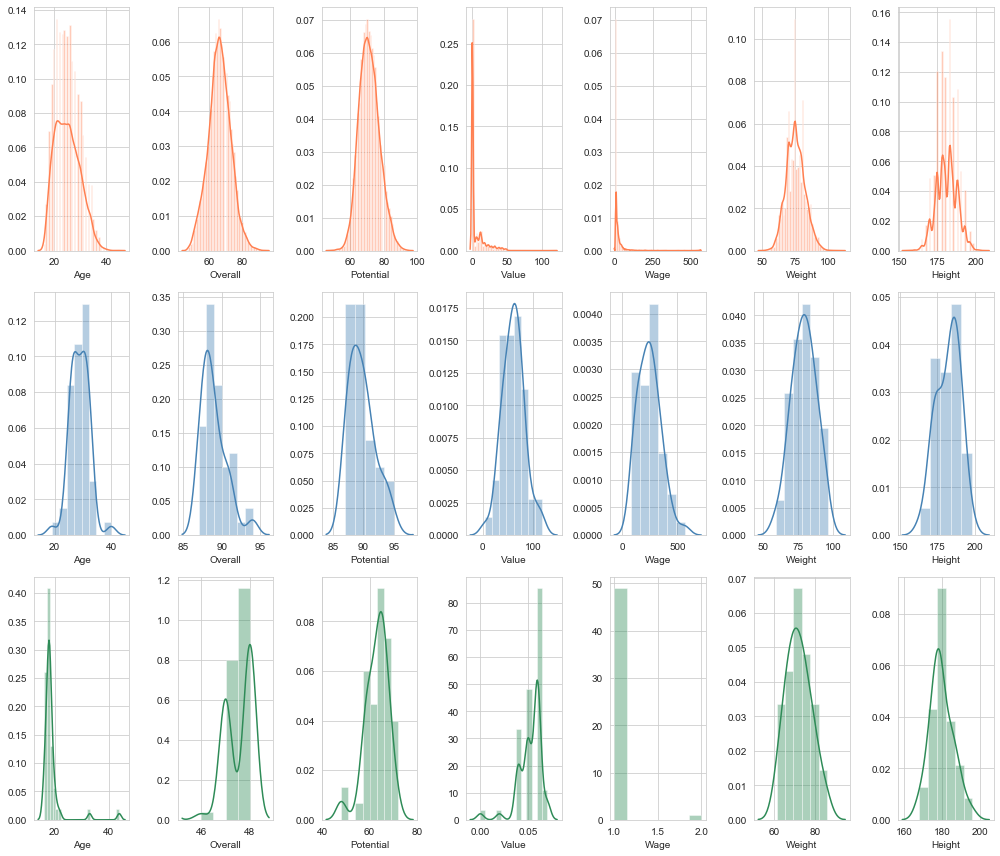

In [19]:
distribution(sel_df, sel_df_top, sel_df_bottom) # Red: General Data, Blue: Top Data, Green: Bottom Data

### Results to Distribution Analysis

- In general data, **Overall and Potential values seem to have a balanced distribution,** Age values skewed left which shows that the young players are more common in general. **Value and Wage data are highly skewed left.**
- Most of the graphs seem to be much more balanced in the top group than in general. This is probably because of the huge difference between the sizes of these groups.

In [20]:
def correlation(df):
    k = 7
    cols = df.corr().nlargest(k, 'Value')['Value'].index
    plt.figure(figsize=(10,6))
    sns.heatmap(df[cols].corr(), annot=True, cmap = 'viridis')

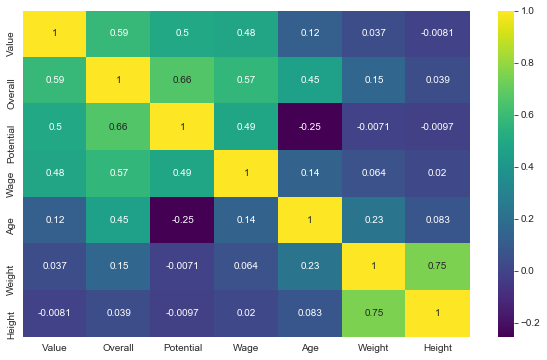

In [21]:
correlation(forcorr_df) # General Data

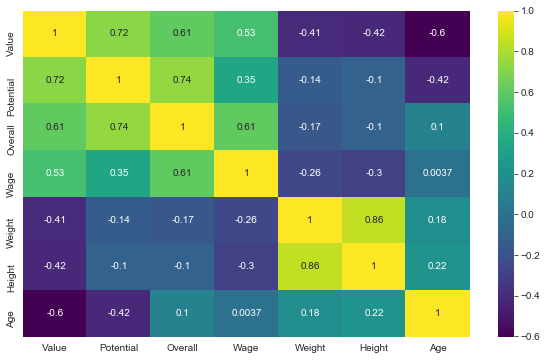

In [22]:
correlation(forcorr_df_top) # Top Data

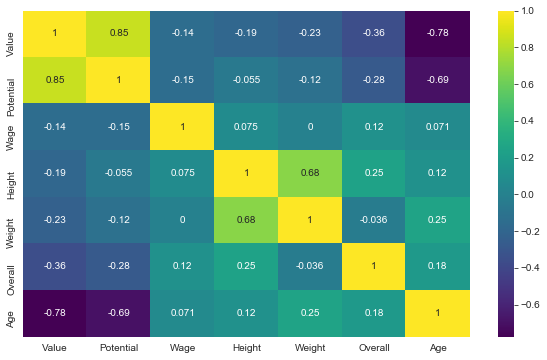

In [23]:
correlation(forcorr_df_bottom) # Bottom Data

### Results to Correlation Analysis

- In general data, **Overall is the most correlated data with Value followed by Potential and Wage.** Overall and Potential has a high correlation. Also, not surprisingly, there is a negative correlation between Age and Potential.
- In the Top, Potential is the most correlated data with Value followed by Overall and Wage. **It can be said that Potential is a little bit more important in the top group.**
- Lastly, In the bottom group, Potential has much more high correlation with Value which is normal because of the much more younger characteristic of the bottom group. Potential is the only rating that has a positive correlation with Value. **It can be said that Potential is everything in the bottom group.**